In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
data = pd.read_csv('Indrajithdataset.CSV')

C:\Users\Indarjith K\AppData\Local\Temp\ipykernel_11912\76008914.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Indrajithdataset.CSV')


In [3]:
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'], format='%d-%m-%Y %H:%M')
data.head(25)

,TripID,RouteID,StopID,StopName,WeekBeginning,NumberOfBoardings
0,23631,100,14156,181 Cross Rd,2013-06-30,1
1,23631,100,14144,177 Cross Rd,2013-06-30,1
2,23632,100,14132,175 Cross Rd,2013-06-30,1
3,23633,100,12266,Zone A Arndale Interchange,2013-06-30,2
4,23633,100,14147,178 Cross Rd,2013-06-30,1
5,23634,100,13907,9A Marion Rd,2013-06-30,1
6,23634,100,14132,175 Cross Rd,2013-06-30,1
7,23634,100,13335,9A Holbrooks Rd,2013-06-30,1
8,23634,100,13875,9 Marion Rd,2013-06-30,1
9,23634,100,13045,206 Holbrooks Rd,2013-06-30,1


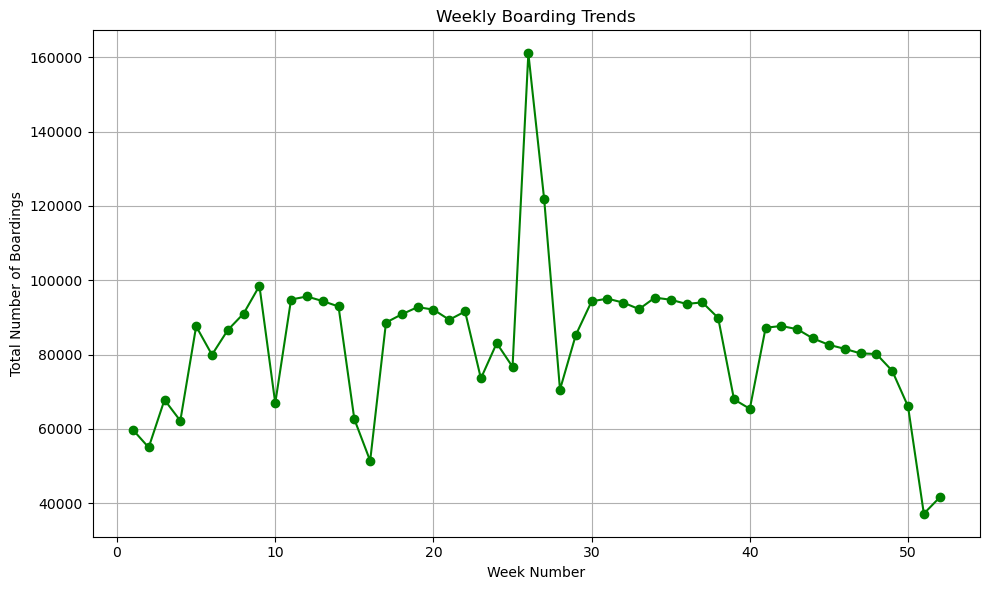

In [4]:
# Convert WeekBeginning to datetime and extract week number
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'])
data['WeekNumber'] = data['WeekBeginning'].dt.isocalendar().week
# Group data by WeekNumber and sum the NumberOfBoardings
weekly_boardings = data.groupby('WeekNumber')['NumberOfBoardings'].sum()
#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(weekly_boardings.index, weekly_boardings.values, marker='o', color='green')
plt.title('Weekly Boarding Trends')
plt.xlabel('Week Number')
plt.ylabel('Total Number of Boardings')
plt.grid(True)
plt.tight_layout()
plt.show()

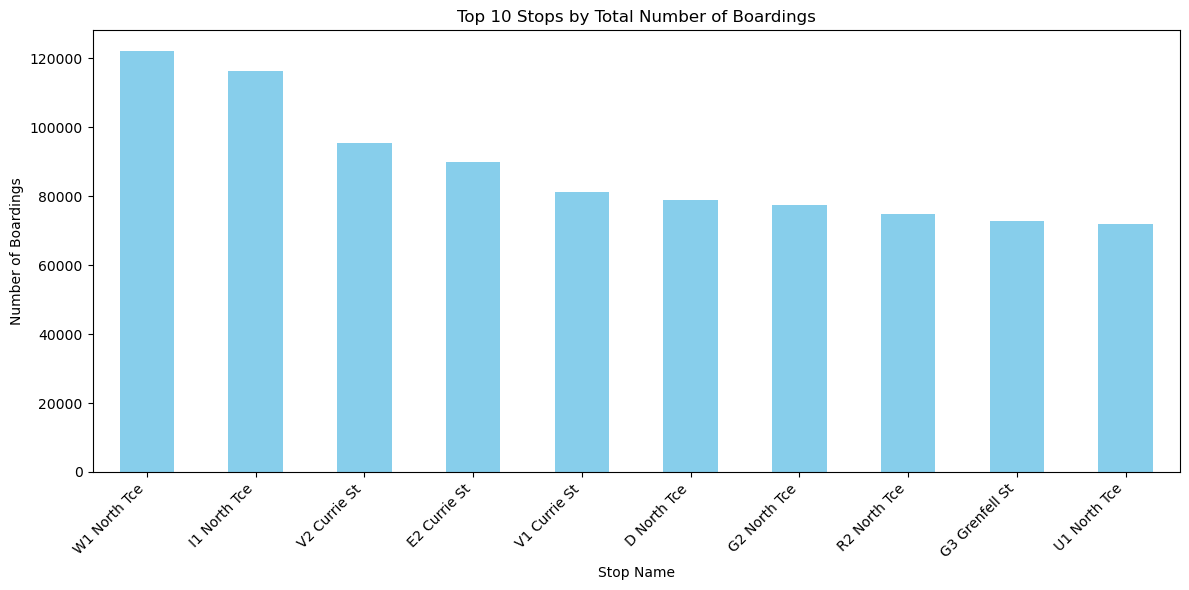

In [5]:
import matplotlib.pyplot as plt
# Group data by StopName and sum the NumberOfBoardings
boarding_counts = data.groupby('StopName')['NumberOfBoardings'].sum()
# Plotting
plt.figure(figsize=(12, 6))
boarding_counts.sort_values(ascending=False).head(10).plot(kind='bar',
color='skyblue')
plt.title('Top 10 Stops by Total Number of Boardings')
plt.xlabel('Stop Name')
plt.ylabel('Number of Boardings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
# Group by RouteID and sum the NumberOfBoardings
boarding_by_route = data.groupby('RouteID')['NumberOfBoardings'].sum()
# Display the result
print(boarding_by_route)

RouteID
117     312470
118     319790
140      83064
141     331118
142      79091
147     169540
148       5190
150     318672
168     296199
169      13397
170     143076
171      91911
100     328740
100B      8250
100C     11828
100K      6364
100N      6419
100P     13277
100S       260
101      39114
115      15460
117      67637
142     287270
144     183253
144G     15814
147     136496
150     105953
150B     55517
150P      8147
155      98191
157     307301
157X     81745
162      92171
167     237238
167C     32195
168      30858
Name: NumberOfBoardings, dtype: int64


In [8]:
data = pd.read_csv('Indrajithdataset.CSV')
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'])
data['WeekNumber'] = data['WeekBeginning'].dt.isocalendar().week
# Group by StopName and WeekNumber, then sum the NumberOfBoardings
weekly_boarding_counts = data.groupby(['StopName','WeekNumber'])['NumberOfBoardings'].sum()
# Find stops with the highest weekly boarding counts
stops_with_highest_boardings = weekly_boarding_counts.groupby('StopName').idxmax()
# Display the result
print(stops_with_highest_boardings)


C:\Users\Indarjith K\AppData\Local\Temp\ipykernel_16900\505267050.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Indrajithdataset.CSV')
C:\Users\Indarjith K\AppData\Local\Temp\ipykernel_16900\505267050.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'])


StopName
1 Anzac Hwy                                          (1 Anzac Hwy, 26)
1 Fullarton Rd                                     (1 Fullarton Rd, 8)
1 George St                                          (1 George St, 27)
1 Glen Osmond Rd                                (1 Glen Osmond Rd, 33)
1 Henley Beach Rd                              (1 Henley Beach Rd, 26)
                                                  ...                 
Zone B Registry Rd Flinders Un    (Zone B Registry Rd Flinders Un, 11)
Zone B West Lakes Interchange      (Zone B West Lakes Interchange, 26)
Zone C Moseley St                              (Zone C Moseley St, 26)
Zone D Arndale Interchange            (Zone D Arndale Interchange, 38)
Zone D Port Adelaide Interchan    (Zone D Port Adelaide Interchan, 26)
Name: NumberOfBoardings, Length: 583, dtype: object


In [8]:
# Convert WeekBeginning to datetime and extract week and month
data['WeekBeginning'] = pd.to_datetime(data['WeekBeginning'])
data['WeekNumber'] = data['WeekBeginning'].dt.isocalendar().week
data['Month'] = data['WeekBeginning'].dt.month
# Group by WeekNumber and Month, then sum the NumberOfBoardings
weekly_boarding_trends = data.groupby(['WeekNumber',
'Month'])['NumberOfBoardings'].sum()
# Display the result
print(weekly_boarding_trends)

WeekNumber  Month
1           1         59791
2           1         55026
3           1         67844
4           1         62204
5           2         87621
6           2         79964
7           2         86610
8           2         91046
9           3         98500
10          3         66953
11          3         94828
12          3         95643
13          3         94406
14          4         92959
15          4         62636
16          4         51434
17          4         88624
18          5         90852
19          5         92782
20          5         92112
21          5         89378
22          6         91608
23          6         73602
24          6         83086
25          6         76725
26          6        161049
27          7        121795
28          7         70588
29          7         85288
30          7         94344
31          8         95061
32          8         93992
33          8         92247
34          8         95341
35          9         94762
36